In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('eda.csv')

In [3]:
df.head()

,pushOnGreenType,gitProject,gitCommit,startDateTime,jiraIssueCount,buildType,canaryDeploy,durationSeconds,multibranch,project_line_covered,...,project_total_high,project_total_low,project_total_medium,project_total_medium_high,project_total_medium_low,projectType,90Days,enabledDate,enabledmonth,enabledyear
0,0,beholder,e6062113b367b3ecf082d6b97318a39d393e8fad,2018-08-09 20:40:18,4,0,0.0,337446,NaN,48.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2019-05-31 19:27:30,2019-08-29 19:27:30,8,2018
1,0,beholder,c9c9075280d02a983fb02fa59f9d80d1229484ca,2018-08-16 20:21:21,1,0,0.0,1730,NaN,213.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2019-05-31 19:27:30,2019-08-29 19:27:30,8,2018
2,0,beholder,25c17251648e919c85cdc1b82eafe1cc7df13493,2018-08-24 15:00:11,1,0,0.0,1521,NaN,237.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2019-05-31 19:27:30,2019-08-29 19:27:30,8,2018
3,0,beholder,eca1044aacda8ce9bd8bf168a7a0d10669461ea2,2018-09-07 19:31:01,1,0,0.0,638,NaN,309.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2019-05-31 19:27:30,2019-08-29 19:27:30,9,2018
4,0,beholder,d9c469547b66a9cd492e5274b6d78b9c47018168,2018-09-08 00:50:07,0,0,0.0,225131,NaN,309.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2019-05-31 19:27:30,2019-08-29 19:27:30,9,2018


In [4]:
df.columns

Index(['pushOnGreenType', 'gitProject', 'gitCommit', 'startDateTime',
       'jiraIssueCount', 'buildType', 'canaryDeploy', 'durationSeconds',
       'multibranch', 'project_line_covered', 'project_branch_covered',
       'project_line_missed', 'inQaTimeSeconds', 'project_instruction_covered',
       'project_branch_missed', 'project_class_covered',
       'project_method_covered', 'project_class_missed',
       'project_method_missed', 'project_instruction_missed', 'commitCount',
       'numberOfNodesUsed', 'project_complexity_covered',
       'project_complexity_missed', 'project_total_high', 'project_total_low',
       'project_total_medium', 'project_total_medium_high',
       'project_total_medium_low', 'projectType', '90Days', 'enabledDate',
       'enabledmonth', 'enabledyear'],
      dtype='object')

In [5]:
df.gitProject.nunique()

61

pushOnGreenType
-1      53
 0    1511
 1    1418
 2      54
dtype: int64

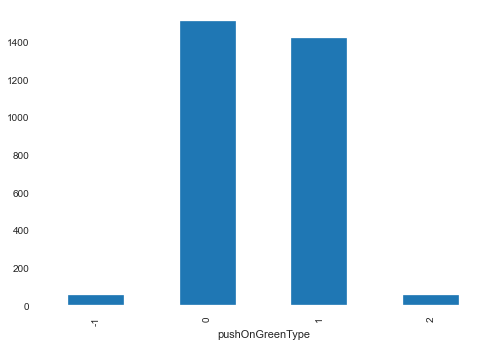

In [6]:
df.groupby('pushOnGreenType').size().plot(kind='bar')
df.groupby('pushOnGreenType').size()

In [7]:
df[['pushOnGreenType', 'jiraIssueCount']].groupby(['pushOnGreenType']).mean()

,jiraIssueCount
pushOnGreenType,
-1,0.962264
0,1.269358
1,0.590973
2,0.981481


,inQaTimeSeconds
pushOnGreenType,
-1,19582.471698
0,32067.923181
1,4522.559322
2,3006.592593


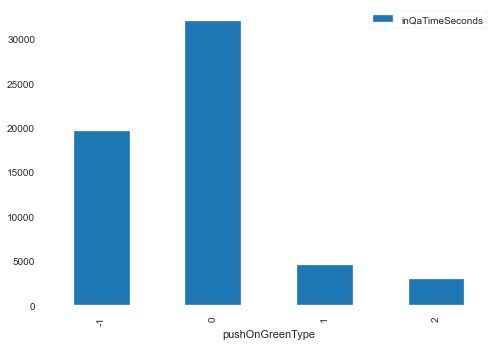

In [8]:
df[['pushOnGreenType', 'inQaTimeSeconds']].groupby(['pushOnGreenType']).mean().plot(kind='bar')
df[['pushOnGreenType', 'inQaTimeSeconds']].groupby(['pushOnGreenType']).mean()

In [9]:
df[['pushOnGreenType', 'buildType']].groupby(['pushOnGreenType']).count()
df.groupby(['pushOnGreenType', 'buildType'])['buildType'].count().rename("count")

pushOnGreenType  buildType
-1               0              53
 0               0            1399
                 1             112
 1               0            1418
 2               0              54
Name: count, dtype: int64

In [10]:
df.query("multibranch==1").groupby(['pushOnGreenType', 'multibranch'])['multibranch'].count().rename("count")

pushOnGreenType  multibranch
0                1.0             1
1                1.0            14
2                1.0             2
Name: count, dtype: int64

In [11]:
df.query("multibranch==1")

,pushOnGreenType,gitProject,gitCommit,startDateTime,jiraIssueCount,buildType,canaryDeploy,durationSeconds,multibranch,project_line_covered,...,project_total_high,project_total_low,project_total_medium,project_total_medium_high,project_total_medium_low,projectType,90Days,enabledDate,enabledmonth,enabledyear
42,0,beholder,4fdaaae6da1d92f3e51cc7b7073ac3827ffb2dca,2019-08-05 18:39:19,1,0,1.0,769,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,2019-05-31 19:27:30,2019-08-29 19:27:30,8,2019
43,2,beholder,3a9fa82def37266776e57e36bd0604992c5f3dd4,2019-08-06 20:31:36,1,0,1.0,582,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,2019-05-31 19:27:30,2019-08-29 19:27:30,8,2019
44,2,beholder,1dbe6d07085ed25609f08fc355d61d2149389a0f,2019-08-06 21:03:52,1,0,1.0,939,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,2019-05-31 19:27:30,2019-08-29 19:27:30,8,2019
45,1,beholder,b0534bda54f13cad5e7bee113d8ececf432018ce,2019-08-29 19:27:30,1,0,1.0,996,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,2019-05-31 19:27:30,2019-08-29 19:27:30,8,2019
46,1,beholder,95ea8f47a87bedd2af28e600b518581c950bd56f,2019-10-15 20:12:08,1,0,1.0,780,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,2019-05-31 19:27:30,2019-08-29 19:27:30,10,2019
47,1,beholder,999faa06897df430a62cf695de69085a7772f837,2019-12-05 17:13:54,1,0,1.0,836,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,2019-05-31 19:27:30,2019-08-29 19:27:30,12,2019
48,1,beholder,704c69404c1363e3191490721b528c06407dac89,2020-01-09 21:45:23,1,0,1.0,1067,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,2019-05-31 19:27:30,2019-08-29 19:27:30,1,2020
49,1,beholder,ee87a8497758c45156385673f1dc30de5584347a,2020-02-10 20:04:04,2,0,1.0,998,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,2019-05-31 19:27:30,2019-08-29 19:27:30,2,2020
50,1,beholder,6358444a3c3b1d166016991599b55661cdcf881a,2020-02-17 22:21:56,1,0,1.0,1070,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,2019-05-31 19:27:30,2019-08-29 19:27:30,2,2020
51,1,beholder,8218e2fb9938b067904ee9211227a550d14496c2,2020-02-19 19:36:59,0,0,1.0,1217,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,2019-05-31 19:27:30,2019-08-29 19:27:30,2,2020


pushOnGreenType  canaryDeploy
-1               0.0             0.886792
                 1.0             0.113208
 0               0.0             0.779616
                 1.0             0.220384
 1               0.0             0.865303
                 1.0             0.134697
 2               0.0             0.888889
                 1.0             0.111111
Name: count, dtype: float64

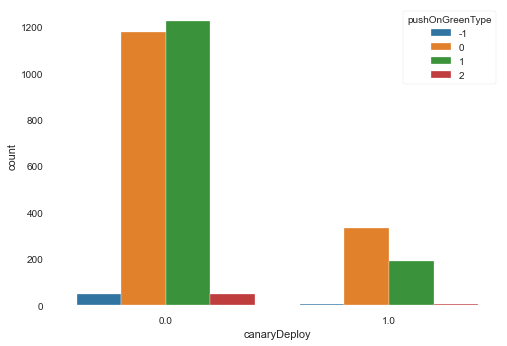

In [12]:
sns.countplot(x="canaryDeploy", hue="pushOnGreenType", data=df)
c = df.groupby(['pushOnGreenType', 'canaryDeploy'])['canaryDeploy'].count().rename("count")
c / c.groupby(level=0).sum()

,durationSeconds
pushOnGreenType,
-1,27222.415094
0,36276.546658
1,7294.368829
2,4431.000000


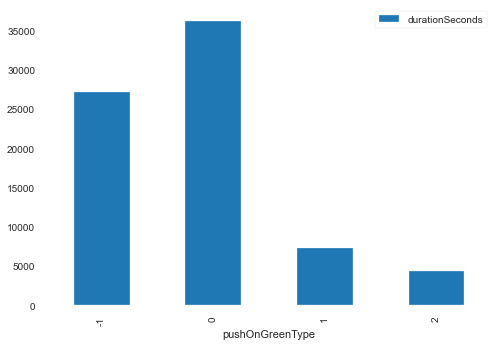

In [13]:
df[['pushOnGreenType', 'durationSeconds']].groupby(['pushOnGreenType']).mean().plot(kind='bar')
df[['pushOnGreenType', 'durationSeconds']].groupby(['pushOnGreenType']).mean()

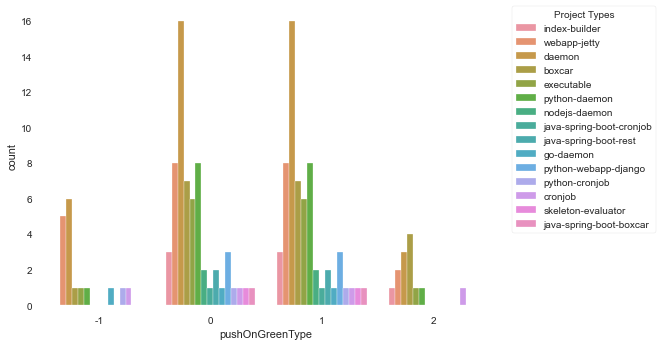

In [14]:
projectTypes = df[['gitProject','projectType','pushOnGreenType']].drop_duplicates()
sns.countplot(x="pushOnGreenType", hue="projectType", data=projectTypes)
labels = ['index-builder', 'webapp-jetty', 'daemon', 'boxcar', 'executable','python-daemon', 'nodejs-daemon',
          'java-spring-boot-cronjob','java-spring-boot-rest','go-daemon', 'python-webapp-django',
          'python-cronjob', 'cronjob', 'skeleton-evaluator','java-spring-boot-boxcar', 
          'java-spring-boot-daemon-webapp','flink-webapp', 'nodejs-cronjob']
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Project Types', labels=labels)

,project_line_covered
pushOnGreenType,
-1,445.222222
0,542.432479
1,844.503333
2,743.769231


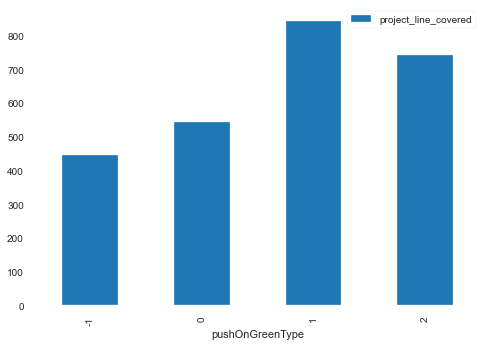

In [15]:
df[['pushOnGreenType', 'project_line_covered']].groupby(['pushOnGreenType']).mean().plot(kind='bar')
df[['pushOnGreenType', 'project_line_covered']].groupby(['pushOnGreenType']).mean()

,project_branch_covered
pushOnGreenType,
-1,87.894737
0,121.843537
1,173.233618
2,181.769231


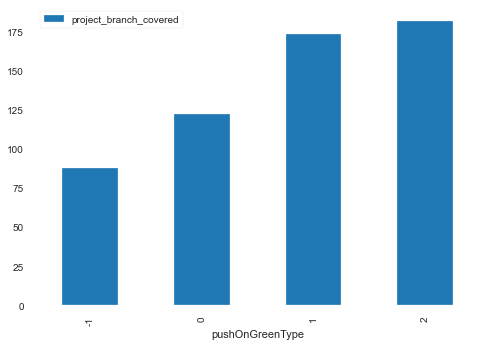

In [16]:
df[['pushOnGreenType', 'project_branch_covered']].groupby(['pushOnGreenType']).mean().plot(kind='bar')
df[['pushOnGreenType', 'project_branch_covered']].groupby(['pushOnGreenType']).mean()

Dropdown(description='Variable', options=(('Project Line Covered', 'project_line_covered'), ('Project Branch C…

                 project_line_covered
pushOnGreenType                      
-1                         445.222222
 0                         542.432479
 1                         844.503333
 2                         743.769231


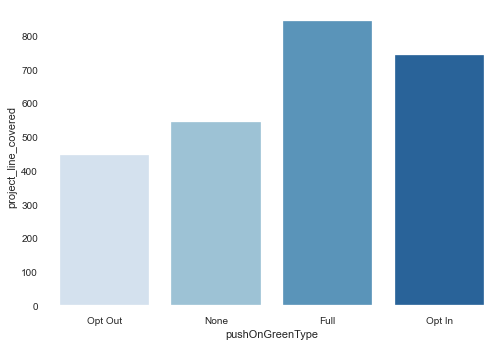

In [17]:
from IPython.display import display, clear_output
import ipywidgets as widgets
from numpy import mean

options = [('Project Line Covered', 'project_line_covered'), 
           ('Project Branch Covered', 'project_branch_covered'), 
           ('Project Line Missed', 'project_line_missed'), 
           ('Project Instruction Covered','project_instruction_covered'), 
           ('Project Branch Missed','project_branch_missed'), 
           ('Project Class Covered','project_class_covered'),
           ('Project Method Covered','project_method_covered'), 
           ('Project Class Missed','project_class_missed'),
           ('Project Method Missed','project_method_missed'), 
           ('Project Instruction Missed','project_instruction_missed'), 
           ('Commit Count','commitCount'),
           ('Project Complexity Covered','project_complexity_covered'),
           ('Project Complexity Missed','project_complexity_missed'), 
           ('Project Total High','project_total_high'), 
           ('Project Total Low','project_total_low'),
           ('Project Total Medium','project_total_medium'), 
           ('Project Total Medium High','project_total_medium_high'),
           ('Project Total Medium Low','project_total_medium_low') 
          ]
default = 'project_line_covered'


w = widgets.Dropdown(
    options=options,
    value = default,
    description='Variable',
)
display(w)

print(df[['pushOnGreenType', default]].groupby(['pushOnGreenType']).mean())
ax=sns.barplot(x="pushOnGreenType", y=default, palette="Blues", estimator=mean, ci=None, data=df)
ax.set_xticklabels(["Opt Out","None","Full", "Opt In"])
plt.show(ax)


def on_change(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        display(w)
        print(df[['pushOnGreenType', change['new']]].groupby(['pushOnGreenType']).mean())
        ax=sns.barplot(x="pushOnGreenType", y=change['new'], palette="Blues", estimator=mean, ci=None, data=df)
        ax.set_xticklabels(["Opt Out","None","Full", "Opt In"])
        plt.show(ax)

w.observe(on_change)

In [18]:
df.iloc[:,[0,9,10,11,13,14,15,16,17,18,19,22,23,24,25,26,27,28]].groupby("pushOnGreenType").apply(lambda x: x.notnull().mean()).drop(['pushOnGreenType'],axis=1).reset_index()

,pushOnGreenType,project_line_covered,project_branch_covered,project_line_missed,project_instruction_covered,project_branch_missed,project_class_covered,project_method_covered,project_class_missed,project_method_missed,project_instruction_missed,project_complexity_covered,project_complexity_missed,project_total_high,project_total_low,project_total_medium,project_total_medium_high,project_total_medium_low
0,-1,0.339623,0.358491,0.339623,0.264151,0.358491,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151,0.264151
1,0,0.387161,0.389146,0.387161,0.271343,0.389146,0.271343,0.271343,0.271343,0.271343,0.271343,0.271343,0.271343,0.193911,0.193911,0.193911,0.193911,0.193911
2,1,0.211566,0.247532,0.211566,0.145980,0.247532,0.145980,0.145980,0.145980,0.145980,0.145980,0.145980,0.145980,0.125529,0.125529,0.125529,0.125529,0.125529
3,2,0.240741,0.240741,0.240741,0.185185,0.240741,0.185185,0.185185,0.185185,0.185185,0.185185,0.185185,0.185185,0.018519,0.018519,0.018519,0.018519,0.018519


Dropdown(description='Variable', options=(('Project Line Covered', 'project_line_covered'), ('Project Branch C…

                 project_line_covered
pushOnGreenType                      
-1                           0.339623
 0                           0.387161
 1                           0.211566
 2                           0.240741


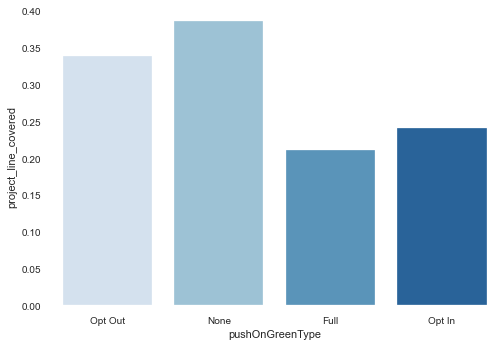

In [19]:
cov=df.iloc[:,[0,9,10,11,13,14,15,16,17,18,19,22,23,24,25,26,27,28]].groupby("pushOnGreenType")\
.apply(lambda x: x.notnull().mean()).drop(['pushOnGreenType'],axis=1).reset_index()
from IPython.display import display, clear_output
import ipywidgets as widgets
from numpy import mean

options = [('Project Line Covered', 'project_line_covered'), 
           ('Project Branch Covered', 'project_branch_covered'), 
           ('Project Line Missed', 'project_line_missed'), 
           ('Project Instruction Covered','project_instruction_covered'), 
           ('Project Branch Missed','project_branch_missed'), 
           ('Project Class Covered','project_class_covered'),
           ('Project Method Covered','project_method_covered'), 
           ('Project Class Missed','project_class_missed'),
           ('Project Method Missed','project_method_missed'), 
           ('Project Instruction Missed','project_instruction_missed'), 
           ('Commit Count','commitCount'),
           ('Project Complexity Covered','project_complexity_covered'),
           ('Project Complexity Missed','project_complexity_missed'), 
           ('Project Total High','project_total_high'), 
           ('Project Total Low','project_total_low'),
           ('Project Total Medium','project_total_medium'), 
           ('Project Total Medium High','project_total_medium_high'),
           ('Project Total Medium Low','project_total_medium_low') 
          ]
default = 'project_line_covered'


w = widgets.Dropdown(
    options=options,
    value = default,
    description='Variable',
)
display(w)

print(cov[['pushOnGreenType', default]].groupby(['pushOnGreenType']).mean())
ax=sns.barplot(x="pushOnGreenType", y=default, palette="Blues", ci=None, data=cov)
ax.set_xticklabels(["Opt Out","None","Full", "Opt In"])
plt.show(ax)


def on_change(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        display(w)
        print(cov[['pushOnGreenType', change['new']]].groupby(['pushOnGreenType']).mean())
        ax=sns.barplot(x="pushOnGreenType", y=change['new'], palette="Blues", estimator=mean, ci=None, data=cov)
        ax.set_xticklabels(["Opt Out","None","Full", "Opt In"])
        plt.show(ax)

w.observe(on_change)

In [20]:
df.columns

Index(['pushOnGreenType', 'gitProject', 'gitCommit', 'startDateTime',
       'jiraIssueCount', 'buildType', 'canaryDeploy', 'durationSeconds',
       'multibranch', 'project_line_covered', 'project_branch_covered',
       'project_line_missed', 'inQaTimeSeconds', 'project_instruction_covered',
       'project_branch_missed', 'project_class_covered',
       'project_method_covered', 'project_class_missed',
       'project_method_missed', 'project_instruction_missed', 'commitCount',
       'numberOfNodesUsed', 'project_complexity_covered',
       'project_complexity_missed', 'project_total_high', 'project_total_low',
       'project_total_medium', 'project_total_medium_high',
       'project_total_medium_low', 'projectType', '90Days', 'enabledDate',
       'enabledmonth', 'enabledyear'],
      dtype='object')

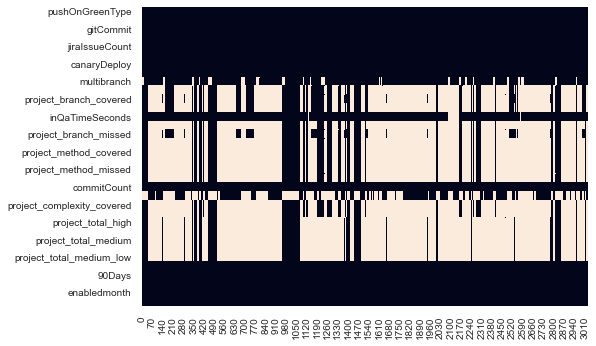

In [21]:
#visualize missing values
sns.heatmap(df.isnull().T, cbar=False)

In [22]:
#Get count of missing values in numeric columns
dfn = df.select_dtypes(exclude=['object'])
dfd = pd.DataFrame(dfn.isnull().sum() / dfn.shape[0]).reset_index()
dfd.columns = ['VarName', 'NaCount']
dfd.sort_values(by= 'NaCount',ascending=False)

,VarName,NaCount
21,project_total_high,0.839921
22,project_total_low,0.839921
25,project_total_medium_low,0.839921
23,project_total_medium,0.839921
24,project_total_medium_high,0.839921
20,project_complexity_missed,0.788867
19,project_complexity_covered,0.788867
16,project_instruction_missed,0.788867
15,project_method_missed,0.788867
13,project_method_covered,0.788867


In [23]:
ml = df.drop(['gitProject','gitCommit','startDateTime','90Days','enabledDate','enabledmonth','enabledyear'],axis=1)

In [24]:
ml.columns

Index(['pushOnGreenType', 'jiraIssueCount', 'buildType', 'canaryDeploy',
       'durationSeconds', 'multibranch', 'project_line_covered',
       'project_branch_covered', 'project_line_missed', 'inQaTimeSeconds',
       'project_instruction_covered', 'project_branch_missed',
       'project_class_covered', 'project_method_covered',
       'project_class_missed', 'project_method_missed',
       'project_instruction_missed', 'commitCount', 'numberOfNodesUsed',
       'project_complexity_covered', 'project_complexity_missed',
       'project_total_high', 'project_total_low', 'project_total_medium',
       'project_total_medium_high', 'project_total_medium_low', 'projectType'],
      dtype='object')

In [25]:
from sklearn import preprocessing

x = ml.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm = pd.DataFrame(x_scaled)

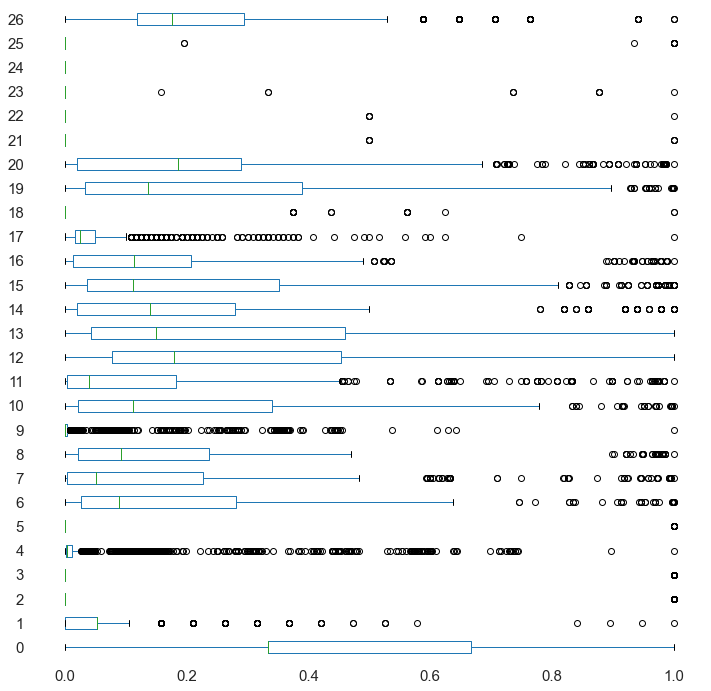

In [26]:
#boxplots to check for outliers
norm.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,12))

In [27]:
df.query("pushOnGreenType==2")

,pushOnGreenType,gitProject,gitCommit,startDateTime,jiraIssueCount,buildType,canaryDeploy,durationSeconds,multibranch,project_line_covered,...,project_total_high,project_total_low,project_total_medium,project_total_medium_high,project_total_medium_low,projectType,90Days,enabledDate,enabledmonth,enabledyear
43,2,beholder,3a9fa82def37266776e57e36bd0604992c5f3dd4,2019-08-06 20:31:36,1,0,1.0,582,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,2019-05-31 19:27:30,2019-08-29 19:27:30,8,2019
44,2,beholder,1dbe6d07085ed25609f08fc355d61d2149389a0f,2019-08-06 21:03:52,1,0,1.0,939,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,2019-05-31 19:27:30,2019-08-29 19:27:30,8,2019
410,2,click-thru-service,a26145798b5dc4132fe0f419eae7f39e89298cb6,2019-11-21 20:36:02,2,0,0.0,907,0.0,103.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2019-09-17 20:20:38,2019-12-16 20:20:38,11,2019
769,2,email-blacklist,57722d8967f0676c4105160b211864de06553924,2020-04-07 09:22:23,1,0,0.0,914,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,2020-01-24 05:06:08,2020-04-23 05:06:08,4,2020
1127,2,feature-store-service,fcc4efcd79bee5d5593be41cb0999c8606be9824,2019-10-10 00:04:27,1,0,0.0,67282,0.0,343.0,...,NaN,NaN,NaN,NaN,NaN,4.0,2019-09-06 00:00:53,2019-12-05 00:00:53,10,2019
1129,2,feature-store-service,aefbdf5c3a28a932b1d868f90b5195b81788e1ea,2019-10-24 18:43:50,1,0,0.0,11360,0.0,343.0,...,NaN,NaN,NaN,NaN,NaN,4.0,2019-09-06 00:00:53,2019-12-05 00:00:53,10,2019
1203,2,graveyard,a3af61a3a6ac18124de9f2ea500ccc5f42a7987d,2019-10-29 01:34:28,1,0,0.0,1121,0.0,358.0,...,NaN,NaN,NaN,NaN,NaN,14.0,2019-09-02 06:15:18,2019-12-01 06:15:18,10,2019
1204,2,graveyard,fa20ec08b45887fcdc26421be6e3d7f993ab6449,2019-11-13 18:37:48,3,0,1.0,1529,0.0,395.0,...,NaN,NaN,NaN,NaN,NaN,14.0,2019-09-02 06:15:18,2019-12-01 06:15:18,11,2019
1288,2,identity-service,e23db684749f139c39e7fd80bd81b2753f12e819,2019-07-23 20:14:28,1,0,0.0,5142,0.0,3753.0,...,NaN,NaN,NaN,NaN,NaN,3.0,2020-01-02 00:00:00,2020-04-01 00:00:00,7,2019
1290,2,identity-service,cb457effe22057c289da5d0bfd5f630a4f53fcc8,2019-07-31 18:15:22,1,0,0.0,3650,0.0,3759.0,...,NaN,NaN,NaN,NaN,NaN,3.0,2020-01-02 00:00:00,2020-04-01 00:00:00,7,2019


In [28]:
df['startDateTime'] = pd.to_datetime(df['startDateTime']).dt.date
df['enabledDate'] = pd.to_datetime(df['enabledDate']).dt.date
df['daysSincePog'] = df['startDateTime'] - df['enabledDate']

In [29]:
df

,pushOnGreenType,gitProject,gitCommit,startDateTime,jiraIssueCount,buildType,canaryDeploy,durationSeconds,multibranch,project_line_covered,...,project_total_low,project_total_medium,project_total_medium_high,project_total_medium_low,projectType,90Days,enabledDate,enabledmonth,enabledyear,daysSincePog
0,0,beholder,e6062113b367b3ecf082d6b97318a39d393e8fad,2018-08-09,4,0,0.0,337446,NaN,48.0,...,0.0,0.0,0.0,0.0,3.0,2019-05-31 19:27:30,2019-08-29,8,2018,-385 days
1,0,beholder,c9c9075280d02a983fb02fa59f9d80d1229484ca,2018-08-16,1,0,0.0,1730,NaN,213.0,...,0.0,0.0,0.0,0.0,3.0,2019-05-31 19:27:30,2019-08-29,8,2018,-378 days
2,0,beholder,25c17251648e919c85cdc1b82eafe1cc7df13493,2018-08-24,1,0,0.0,1521,NaN,237.0,...,0.0,0.0,0.0,0.0,3.0,2019-05-31 19:27:30,2019-08-29,8,2018,-370 days
3,0,beholder,eca1044aacda8ce9bd8bf168a7a0d10669461ea2,2018-09-07,1,0,0.0,638,NaN,309.0,...,0.0,0.0,0.0,0.0,3.0,2019-05-31 19:27:30,2019-08-29,9,2018,-356 days
4,0,beholder,d9c469547b66a9cd492e5274b6d78b9c47018168,2018-09-08,0,0,0.0,225131,NaN,309.0,...,0.0,0.0,0.0,0.0,3.0,2019-05-31 19:27:30,2019-08-29,9,2018,-355 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,1,we-service,28338228c4f01067a9fa44bcba403eb1e3f16e9d,2020-03-24,1,0,0.0,826,0.0,NaN,...,NaN,NaN,NaN,NaN,2.0,2019-12-14 16:14:22,2020-03-13,3,2020,11 days
3032,1,we-service,9d3fb1135b3e44d91ad6858b33d7ac22936dc58d,2020-03-26,1,0,0.0,627,0.0,NaN,...,NaN,NaN,NaN,NaN,2.0,2019-12-14 16:14:22,2020-03-13,3,2020,13 days
3033,1,we-service,4297626a15a6bcd1e4d7599c7bdbff9db88eb828,2020-04-20,1,0,0.0,959,0.0,NaN,...,NaN,NaN,NaN,NaN,2.0,2019-12-14 16:14:22,2020-03-13,4,2020,38 days
3034,1,we-service,b752430bfd1f916a4520d1c9d2b6957b3daa86aa,2020-08-04,0,0,1.0,1072,0.0,NaN,...,0.0,0.0,0.0,0.0,2.0,2019-12-14 16:14:22,2020-03-13,8,2020,144 days


In [30]:
start = df.set_index('startDateTime', inplace=False)

In [31]:
start

,pushOnGreenType,gitProject,gitCommit,jiraIssueCount,buildType,canaryDeploy,durationSeconds,multibranch,project_line_covered,project_branch_covered,...,project_total_low,project_total_medium,project_total_medium_high,project_total_medium_low,projectType,90Days,enabledDate,enabledmonth,enabledyear,daysSincePog
startDateTime,,,,,,,,,,,,,,,,,,,,,
2018-08-09,0,beholder,e6062113b367b3ecf082d6b97318a39d393e8fad,4,0,0.0,337446,NaN,48.0,18.0,...,0.0,0.0,0.0,0.0,3.0,2019-05-31 19:27:30,2019-08-29,8,2018,-385 days
2018-08-16,0,beholder,c9c9075280d02a983fb02fa59f9d80d1229484ca,1,0,0.0,1730,NaN,213.0,78.0,...,0.0,0.0,0.0,0.0,3.0,2019-05-31 19:27:30,2019-08-29,8,2018,-378 days
2018-08-24,0,beholder,25c17251648e919c85cdc1b82eafe1cc7df13493,1,0,0.0,1521,NaN,237.0,82.0,...,0.0,0.0,0.0,0.0,3.0,2019-05-31 19:27:30,2019-08-29,8,2018,-370 days
2018-09-07,0,beholder,eca1044aacda8ce9bd8bf168a7a0d10669461ea2,1,0,0.0,638,NaN,309.0,82.0,...,0.0,0.0,0.0,0.0,3.0,2019-05-31 19:27:30,2019-08-29,9,2018,-356 days
2018-09-08,0,beholder,d9c469547b66a9cd492e5274b6d78b9c47018168,0,0,0.0,225131,NaN,309.0,82.0,...,0.0,0.0,0.0,0.0,3.0,2019-05-31 19:27:30,2019-08-29,9,2018,-355 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-24,1,we-service,28338228c4f01067a9fa44bcba403eb1e3f16e9d,1,0,0.0,826,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2019-12-14 16:14:22,2020-03-13,3,2020,11 days
2020-03-26,1,we-service,9d3fb1135b3e44d91ad6858b33d7ac22936dc58d,1,0,0.0,627,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2019-12-14 16:14:22,2020-03-13,3,2020,13 days
2020-04-20,1,we-service,4297626a15a6bcd1e4d7599c7bdbff9db88eb828,1,0,0.0,959,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2019-12-14 16:14:22,2020-03-13,4,2020,38 days


In [32]:
new = start.groupby(['pushOnGreenType', 'daysSincePog']).size().reset_index()
new.columns = ['pushOnGreenType', 'daysSincePog', 'count']
new['daysSincePog'] = new.daysSincePog.dt.days.astype('int')



In [33]:
nonZero = new[(new['daysSincePog']== 0) & (new['pushOnGreenType'] == 1)]
nonZero

,pushOnGreenType,daysSincePog,count
669,1,0,76


In [34]:
negZero = new[(new['daysSincePog']< 0) & (new['pushOnGreenType'] == 1)]
negZero

,pushOnGreenType,daysSincePog,count
652,1,-428,1
653,1,-400,1
654,1,-394,1
655,1,-393,1
656,1,-392,1
657,1,-390,1
658,1,-387,1
659,1,-372,1
660,1,-370,1
661,1,-364,1


In [35]:
new = new.drop(669, axis=0)

In [36]:
new = new.drop(list(negZero.index), axis=0)

In [37]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117 entries, 0 to 1134
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   pushOnGreenType  1117 non-null   int64
 1   daysSincePog     1117 non-null   int64
 2   count            1117 non-null   int64
dtypes: int64(3)
memory usage: 34.9 KB


In [38]:
new['daysSincePog'].nunique()

948

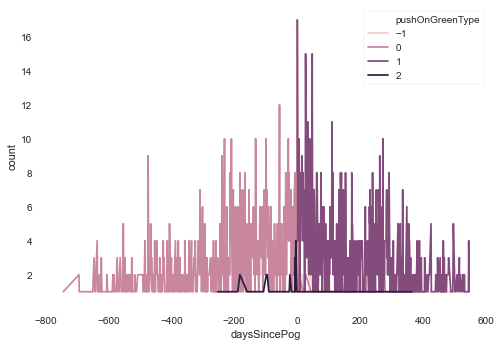

In [39]:
sns.lineplot(x="daysSincePog", y="count", hue='pushOnGreenType', data=new)

In [46]:
import plotly.express as px
import chart_studio.plotly as py

fig = px.line(new, x="daysSincePog", y="count", color="pushOnGreenType",
              line_group="pushOnGreenType", hover_name="pushOnGreenType")
fig.show()

#py.iplot(fig, filename = 'pog-by-day')


In [41]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036 entries, 0 to 3035
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pushOnGreenType              3036 non-null   int64  
 1   jiraIssueCount               3036 non-null   int64  
 2   buildType                    3036 non-null   int64  
 3   canaryDeploy                 3036 non-null   float64
 4   durationSeconds              3036 non-null   int64  
 5   multibranch                  2717 non-null   float64
 6   project_line_covered         916 non-null    float64
 7   project_branch_covered       971 non-null    float64
 8   project_line_missed          916 non-null    float64
 9   inQaTimeSeconds              2948 non-null   float64
 10  project_instruction_covered  641 non-null    float64
 11  project_branch_missed        971 non-null    float64
 12  project_class_covered        641 non-null    float64
 13  project_method_cov

In [42]:
rows = list(df.query("pushOnGreenType == -1 or pushOnGreenType == 2").index)
ml = ml.drop(rows, axis=0)

In [43]:
ml.pushOnGreenType.value_counts()

0    1511
1    1418
Name: pushOnGreenType, dtype: int64

In [44]:
#ml.to_csv('ml.csv', )